## **Install dependencies**

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

bash: line 1: apt-get: command not found
bash: line 2: apt-get: command not found



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


ERROR: Invalid requirement: '/tmp/mecab-python-0.996'
Hint: It looks like a path. File '/tmp/mecab-python-0.996' does not exist.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


CalledProcessError: Command 'b'bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)\npip3 install /tmp/mecab-python-0.996\n'' returned non-zero exit status 1.

## **Example**

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import pandas as pd

In [ ]:


# -*- coding: utf-8 -*-



def clean_text(text):
    """
    한글, 영문, 숫자만 남기고 제거한다.
    :param text:
    :return:
    
    """
    text = text.replace(".", " ").strip()
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text


def get_nouns(tokenizer, sentence):
    """
    단어의 길이가 2이상인 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환한다.
    :param tokenizer:
    :param sentence:
    :return:
    """
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
    return nouns

def delete_stopwords(processed_data):
    """
    불용어 처리
    """
    data = []
    stopwords = ['고려','대학교','안녕','경우','학교','교환','과목','나라','시간','한국','정도','절차',
                 '작성','신청','대부분','경험','사용','학생','생각','진행','가능','관련','확인']
    for doc in processed_data:
      word_list = [x for x in doc if x not in stopwords]
      data.append(word_list)

    return data

def tokenize(i,df):
    tokenizer = Mecab()
    processed_data = []
    
    for sent in tqdm(df[i]):
        sentence = clean_text(sent.replace('\n', '').strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data


          
if __name__ == '__main__':
    
    data = pd.read_excel('data.xlsx')
    word_list = lambda x : [word for sublist in x for word in sublist ]
    words = []
    for i in range(1,10):
      processed_data = tokenize(i,data) 
      processed_data = delete_stopwords(processed_data)
      words.append(word_list(processed_data))

100%|██████████| 1200/1200 [00:04<00:00, 256.08it/s]


In [ ]:
if __name__ == '__main__':
    
    data = pd.read_excel('data.xlsx')
    word_list = lambda x : [word for sublist in x for word in sublist ]
    words = []
    for i in range(1,10):
      processed_data = tokenize(i,data) 
      processed_data = delete_stopwords(processed_data)
      words.append(word_list(processed_data))

In [ ]:
!pip install wordcloud
!apt-get install fonts-nanum* -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

In [ ]:
new_words = word_list(words)
counts = Counter(new_words)
tags = dict(counts.most_common(40))

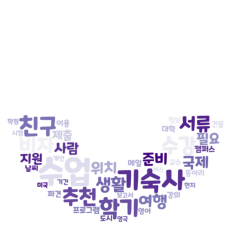

In [ ]:
icon = Image.open('./down.png')    # 마스크가 될 이미지 불러오기 
plt.axis('off')

mask = Image.new("RGB", icon.size, (1000,1000,1000))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path = '/content/Maplestory OTF Bold.otf', prefer_horizontal = True, 
               background_color='white', mask = mask,
               width = 1200, height = 800,colormap = 'Purples',)

cloud = wc.generate_from_frequencies(tags)
image_colors = ImageColorGenerator(mask)

plt.imshow(wc)


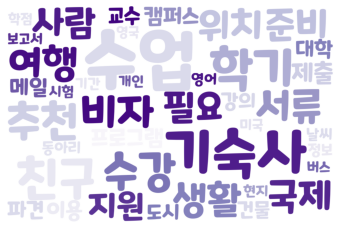

In [ ]:
wc = WordCloud(font_path = '/content/Maplestory OTF Bold.otf', prefer_horizontal = True, 
               background_color='white',
               width = 1200, height = 800,colormap = 'Purples',)
wc = wc.generate_from_frequencies(tags)
plt.axis('off')
plt.imshow(wc)